In [4]:
# jupyter nbconvert ./PCA.ipynb --to slides --post serve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# What is PCA?
- PCA is a dimensionality reduction technique.
- It is a Feature Extraction algorithm, not a feature selection.

    convert n features to k, where k<n

# Applications of PCA

**1. Data Compression**

    - e.g. Converting a 50D data into 10D.
    
    
**2. Data Visualization**

    - reducing the dimension to 2D or 3D, in order to visualize the dataset 
    
    
**3. Speed Up Computation**

    - reduces load on memory

# Intuition of PCA

| Test Scores | Assignment | CGPA |
|:-------------:|:------------:|------|
| 91          | 3          |      |
| 52          | 2          |      |
| 85          | 3          |      |
| 79          | 3          |      |
| 63          | 2          |      |

    - preserve the direction/feature having maxium variability.
    - more spread = more information
    

In [6]:
X = np.random.randn(50, 1)*5 + 10 

y = 3*X + np.random.randn(50,1)*5

X = (X - X.mean())/X.std()
y = (y - y.mean())/y.std()


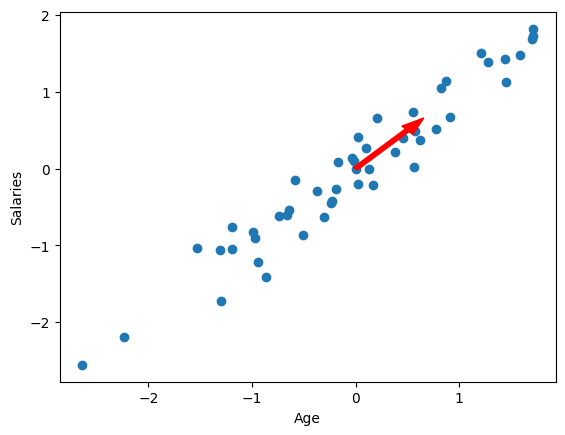

In [7]:

x, u = [0,0.4],[0,0.4]
plt.scatter(X, y)
plt.xlabel("Age")
plt.ylabel("Salaries")
plt.arrow(0, 0, 0.5, 0.5, width = 0.05, color='red')
# plt.show()
plt.savefig("./imgs/frame_with_dir.jpg")

**Now 2D data looks like this. Which feature would you choose?**

<img src="./imgs/frame1.jpg" align=left>


**Idea:**
1. Find the directions $f_1^{'}$ and $f_2^{'}$. such that spread on $f_1^{'}$ >> spread on $f_2^{'}$
2. Drop $f_2^{'}$
3. Project all data points onto $f_1^{'}$

        - Thus 2D -> 1D
        - It is like the rotation of axis
        
        
        
<br>

**Note:** 
Find a direction such that the variance of $x^{i}$ projected onto the direction is maximized.

# PCA Objective - Maximizing Variance

<img src="./imgs/frame_with_direction.jpg" align=left>

$\Large u_1 : unit vector $,  $\large ||u|| = 1$

<!-- $\huge u^T.u = 1$ -->


$\huge x_i^{'} = proj_{u1} (x_i) $

$\huge x_i^{'} = \frac{u_1.x_i}{||u_1||} $

$\huge x_i^{'} = u_1^T.x_i $

<br>
Find $u_1$ such that var{$proj_{u1} (x_i)$} is maximum.

# PCA Objective - Minimizing Distances

<img src="./imgs/frame_with_dis.jpg" align=left>

$\Large min_{u_1} \sum_{i=1}^{m} {d_i^2} $ 



<br>
Find $u_1$ such that if we take all the distance sqaured from each point on $u_1$ , it should be minimized.

# Eigen Values and Eigen Vectors

####  Equation : 
$\Large  \lambda_1.v_1 = S.v_1$

where:

$\lambda_1 : eigen value$
, $v_1 : eigen vector$
, $S : Covariance Matrix$

# PCA Summary

1. Column Standardise
2. $ \large S = \frac{X^T.X}{m}$
3. compute eigen values & eigenvectors of S. <br>
     $eigen(S) = (\lambda_1 \geq \lambda_2 \geq  \lambda_3 ... \geq \lambda_n$)
    and 
    ( $v_1, v_2, v_3 ... v_n$ )

4. $u_1 = v_1$ and  $u_2 = v_2 ...$
5. Select top K eigen vectors.
6. Project $x_i$ on selected eigen vectors.

# Understanding Eigen-values

Eigen values of covar matix (S) =
$(\lambda_1 \geq \lambda_2 \geq  \lambda_3 ... \geq \lambda_n$)
and 
( $v_1, v_2, v_3 ... v_n$ )

Variance explained by ($i^{th}$ eigen vector) = $ \LARGE \frac{\lambda_i}{ \sum_{i=1}^{d}{\lambda_i}}$

# PCA Code (from scratch)
<img src='https://media.giphy.com/media/765ccrAiB0g9z6EApL/giphy.gif' style="height:300px;">

# Choosing the right dimensions